# Linear Regression


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [5]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

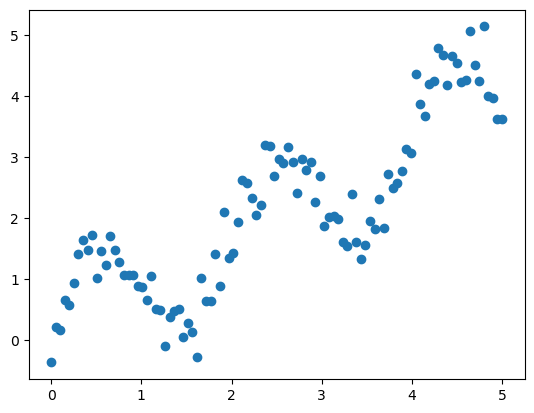

In [8]:
plt.scatter(x,y)

#### nonlinear

In [11]:
regr_lin = LinearRegression()

In [13]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [15]:
regr_lin.fit(X,y)

LinearRegression()

0.5808085366358935


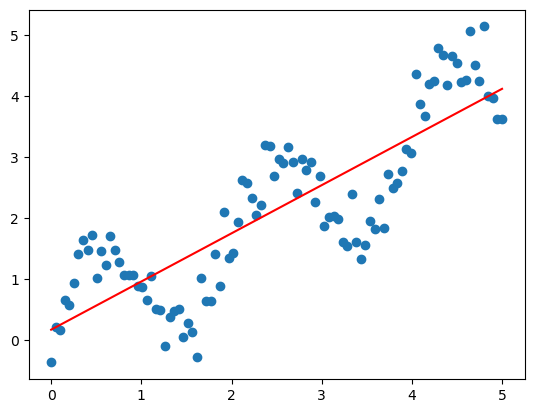

In [17]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [22]:
print(x.shape)

(100,)


In [24]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [26]:
regr_poly = LinearRegression()

In [28]:
regr_poly.fit(X_poly, y)

LinearRegression()

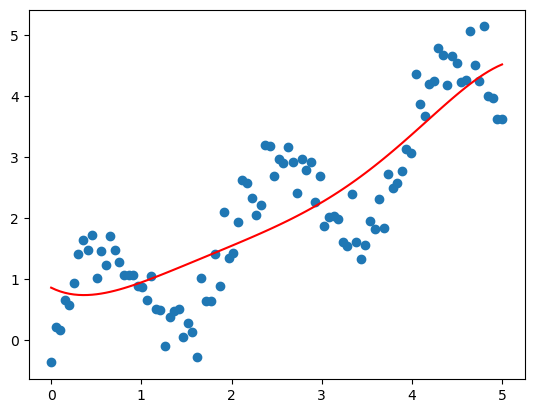

In [30]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [32]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.73955569  1.32384258 -0.62643519  0.13971017 -0.01112291]
interception:  0.8629537603078887


In [34]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.86295376, 0.82889947, 0.8011272 , 0.77918492, 0.76264153,
       0.75108644, 0.74412912, 0.74139866, 0.74254335, 0.74723019,
       0.75514453, 0.76598956, 0.77948591, 0.7953712 , 0.8133996 ,
       0.83334141, 0.85498258, 0.87812432, 0.90258262, 0.92818785,
       0.95478428, 0.98222967, 1.01039484, 1.0391632 , 1.06843031,
       1.09810351, 1.12810137, 1.15835334, 1.1887993 , 1.21938907,
       1.25008202, 1.28084661, 1.31165998, 1.34250747, 1.37338219,
       1.40428462, 1.43522213, 1.46620855, 1.49726375, 1.52841316,
       1.5596874 , 1.59112177, 1.62275585, 1.65463305, 1.68680019,
       1.71930703, 1.75220585, 1.78555102, 1.81939853, 1.85380559,
       1.88883017, 1.92453056, 1.96096493, 1.99819091, 2.03626514,
       2.07524281, 2.11517726, 2.15611953, 2.19811788, 2.24121743,
       2.28545963, 2.33088192, 2.37751719, 2.42539342, 2.47453322,
       2.52495336, 2.57666437, 2.62967007, 2.68396718, 2.73954483,
       2.79638413, 2.85445775, 2.9137295 , 2.97415383, 3.03567

In [36]:
regr_poly.predict(X_poly)

array([0.86295376, 0.82889947, 0.8011272 , 0.77918492, 0.76264153,
       0.75108644, 0.74412912, 0.74139866, 0.74254335, 0.74723019,
       0.75514453, 0.76598956, 0.77948591, 0.7953712 , 0.8133996 ,
       0.83334141, 0.85498258, 0.87812432, 0.90258262, 0.92818785,
       0.95478428, 0.98222967, 1.01039484, 1.0391632 , 1.06843031,
       1.09810351, 1.12810137, 1.15835334, 1.1887993 , 1.21938907,
       1.25008202, 1.28084661, 1.31165998, 1.34250747, 1.37338219,
       1.40428462, 1.43522213, 1.46620855, 1.49726375, 1.52841316,
       1.5596874 , 1.59112177, 1.62275585, 1.65463305, 1.68680019,
       1.71930703, 1.75220585, 1.78555102, 1.81939853, 1.85380559,
       1.88883017, 1.92453056, 1.96096493, 1.99819091, 2.03626514,
       2.07524281, 2.11517726, 2.15611953, 2.19811788, 2.24121743,
       2.28545963, 2.33088192, 2.37751719, 2.42539342, 2.47453322,
       2.52495336, 2.57666437, 2.62967007, 2.68396718, 2.73954483,
       2.79638413, 2.85445775, 2.9137295 , 2.97415383, 3.03567

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [39]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [41]:
sigma = 0.3

In [43]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [45]:
regr_rbf = LinearRegression()

In [47]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

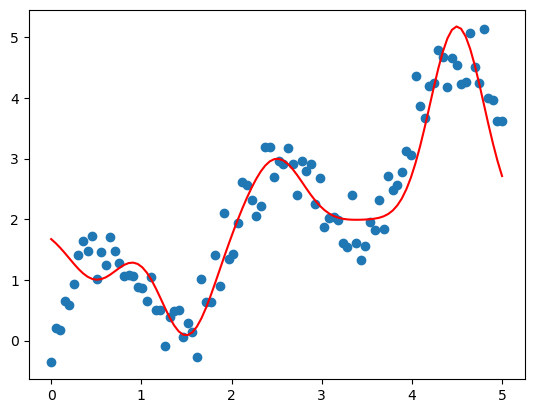

In [49]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [51]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.88261563 -1.8074047   1.11174663  0.08667863  3.28598352]
interception:  1.8931934489542257


#### Comparison

In [54]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

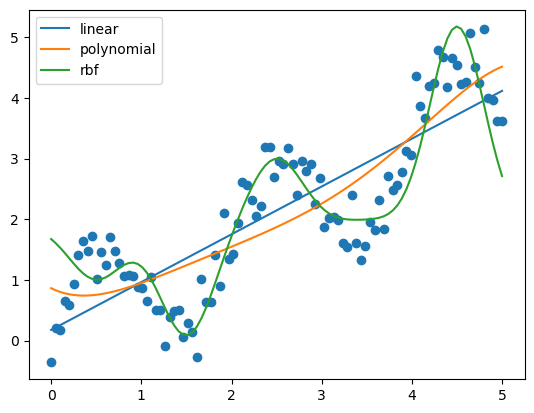

In [56]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [59]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5808085366358935


In [61]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5173720338870296


In [63]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2807639752186217
